# POTENCIAL OUTCOMES AND RCTs
### INTEGRANTS:
- Diego
- Alvaro
- Luis

# Multicollinearity

DESCRIBE MULTICOLLINEARITY AND EXAMPLES

In [59]:
#Import packages
import pandas as pd
import numpy as np
import random

In [87]:
random.seed(23)

#Create 9 normal random vectors
x1 = np.random.normal(0,1,10)
x2 = np.random.normal(0,1,10)
x3 = np.random.normal(0,1,10)
x4 = np.random.normal(0,1,10)
x5 = np.random.normal(0,1,10)
x6 = np.random.normal(0,1,10)
x7 = np.random.normal(0,1,10)
x8 = np.random.normal(0,1,10)
x9 = np.random.normal(0,1,10)

#Create 10th vector: linear combination of 3 vectors
x10 = 3*x1 + 1.2*x8 - 0.5*x5

#Create a matrix 10x10 B
A = np.vstack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)) 
B = np.transpose(A)
print(B)

[[ 0.20459621  1.20284322 -0.50391714  1.63902654  1.40531386 -0.93089906
  -0.11961533 -0.31706366 -2.30681588 -0.46934468]
 [-0.01986047  0.46394209  1.56158901  0.77391367  0.66609501 -0.78776229
  -0.73517873  1.24190738  0.06822005  1.09765994]
 [ 0.76520873 -0.52238969 -0.41443718  1.95688427 -1.84516777  0.14425377
  -1.36551259 -1.58073538  0.21238591  1.3213276 ]
 [-0.17341059 -0.3403815  -0.55242332 -1.25143647  0.40737378 -2.13050775
   1.16967449  0.89548004  2.05658107  0.35065739]
 [ 0.20552745 -0.24825591 -0.92146302  1.34846244  0.21241866 -0.32238543
  -0.06974431 -0.03661156  1.58998466  0.46643916]
 [ 1.48986498  0.61377271 -0.96976134 -0.07797589  0.14848957 -0.89100912
  -1.62139961  1.6625944  -2.57221736  6.39046343]
 [ 0.72681479 -1.42951372  0.68768086 -0.02284909 -0.64663689 -1.63852604
  -1.03854347  1.4072328   2.50034539  4.19244217]
 [ 0.9571944   0.79119742 -0.75026208  0.5975279  -0.43680745 -0.2316121
   1.02743135 -0.72595507 -2.25398435  2.21884084]
 

In [94]:
#Calculate inverse matrix of B
C = np.linalg.inv(B)
print(C)
print("\nThe determinant of the matrix is: ",np.linalg.det(B))

[[-1.24929285e+16  7.74762356e+15  6.75820222e+15  9.00719925e+15
   4.67738864e+15  2.57038815e+15 -1.32472967e+16 -6.19659703e+14
   4.77908054e+15 -6.12263158e+15]
 [-6.34557209e-01  1.38338881e+00  3.14286218e-01  3.20386367e-01
  -7.62835004e-02  2.81671930e-01 -9.50039177e-01 -1.41250437e-01
  -2.69418839e-02  4.36229129e-01]
 [-1.08917043e+00  1.22667742e+00  4.20093962e-01  3.34721523e-01
   6.23046955e-02  1.02815948e-01 -6.68810994e-01  6.07962828e-02
   4.17897727e-01 -4.52086385e-01]
 [ 1.26996788e+00 -1.10703216e+00 -5.67558997e-01 -9.05848589e-01
   2.58776772e-01 -5.23660549e-01  2.43370600e+00  3.42575402e-01
  -6.32958464e-01  4.24645404e-01]
 [ 2.08215476e+15 -1.29127059e+15 -1.12636704e+15 -1.50119988e+15
  -7.79564773e+14 -4.28398026e+14  2.20788279e+15  1.03276617e+14
  -7.96513423e+14  1.02043860e+15]
 [ 9.20241533e-01 -6.43600312e-01 -5.97019474e-01 -9.20241533e-01
   9.31616755e-02 -1.60189127e-01  1.28720062e+00  1.25608974e-01
  -1.36898708e-01  4.60120767e-01

The determinant of matrix B (with a linear combination 10th column) is almost zero. That's means one of the columns is a linear combination of others columns.

# Analyzing RCT data with Precision Adjustment

In [138]:
#!pip install pyreadr
#!pip install matplotlib
#!pip install seaborn
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [140]:
Penn.shape

(5782, 24)

In [141]:
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [142]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace dep  q1  \
0  10824   0        18        18       0      0         0        0   2   0   
1  10635   2         7         3       0      0         0        0   0   0   
3  10824   0         1         1       0      0         0        0   0   0   
4  10747   0        27        27       0      0         0        0   0   0   
9  10754   2        20        20       1      0         0        0   0   0   

   ...  q6  recall  agelt35  agegt54  durable  nondurable  lusd  husd  muld  \
0  ...   0       0        0        0        0           0     1     0   NaN   
1  ...   0       1        0        0        0           1     0     0   NaN   
3  ...   0       0        0        0        0           1     0     0   NaN   
4  ...   0       0        0        0        0           1     0     0   NaN   
9  ...   0       0        0        0        0           0     0     1   NaN   

   T2  
0   0  
1   1  
3   0  
4   0  
9   1  

[5 rows x 25 columns]

In [143]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [144]:
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   abdt         5782 non-null   int64   
 1   tg           5782 non-null   int64   
 2   inuidur1     5782 non-null   int64   
 3   inuidur2     5782 non-null   int64   
 4   female       5782 non-null   int64   
 5   black        5782 non-null   int64   
 6   hispanic     5782 non-null   int64   
 7   othrace      5782 non-null   int64   
 8   dep          5782 non-null   category
 9   q1           5782 non-null   int64   
 10  q2           5782 non-null   int64   
 11  q3           5782 non-null   int64   
 12  q4           5782 non-null   int64   
 13  Unnamed: 13  5782 non-null   int64   
 14  q5           5782 non-null   int64   
 15  q6           5782 non-null   int64   
 16  recall       5782 non-null   int64   
 17  agelt35      5782 non-null   int64   
 18  agegt54      5782 non-null 

### Plot histogram: treatment vs control

<AxesSubplot:xlabel='inuidur1', ylabel='Percent'>

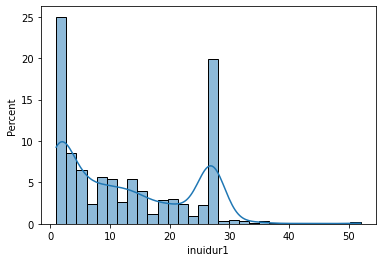

In [154]:
#Plot histogram: treatment group
fig, ax = plt.subplots()
sns.histplot(Penn[(Penn['T2'] == 1)].inuidur1,stat="percent",bins=30,kde=True)

<AxesSubplot:xlabel='inuidur1', ylabel='Percent'>

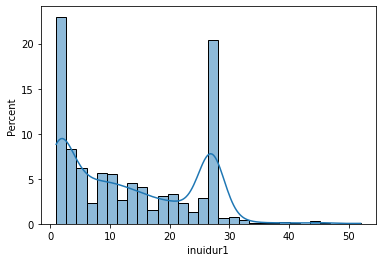

In [155]:
#Plot histogram: control group
fig, ax = plt.subplots()
sns.histplot(Penn[(Penn['T2'] == 0)].inuidur1,stat="percent",bins=30,kde=True)

### Specifications

#### 1. Classical 2-sample approach, no adjustment (CL)

#### 2. Classical linear regression adjustment (CRA)

#### 3. Interactive regression adjustment (IRA)

#### 4. Interactive regression adjustment (IRA) using Lasso.